### Loan Approval Prediction

#### Import Necessary Library

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics


#### Import the Dataset

In [2]:
df=pd.read_csv("D:/repository/Loan_Approval_Prediction/loan_approval_dataset.csv")
print(df.head(3))
print(df.shape)

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
(4269, 13)


In [3]:
df=df.drop(columns=["loan_id"])
# Addressing space in column name
df.rename(columns=lambda x:x.replace(" ",""),inplace=True)

### EDA

#### Check for null value

In [4]:
print(df.isnull().sum())

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


#### Get all the numerical/Categorial dtype column

In [5]:
categorical=df.select_dtypes(include=['object']).columns
numerical=df.select_dtypes(exclude=['object']).columns
print("Categorical variable:",categorical)
print("Numerical variable",numerical)

Categorical variable: Index(['education', 'self_employed', 'loan_status'], dtype='object')
Numerical variable Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


### Find all the unique value in data

In [6]:
for i in categorical:
    print(i)
    print(df[i].unique())

education
[' Graduate' ' Not Graduate']
self_employed
[' No' ' Yes']
loan_status
[' Approved' ' Rejected']


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB
None


In [8]:
print(df.describe())

       no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       4269.000000  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean           2.498712  5.059124e+06  1.513345e+07    10.900445   599.936051   
std            1.695910  2.806840e+06  9.043363e+06     5.709187   172.430401   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.700000e+06  7.700000e+06     6.000000   453.000000   
50%            3.000000  5.100000e+06  1.450000e+07    10.000000   600.000000   
75%            4.000000  7.500000e+06  2.150000e+07    16.000000   748.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.269000e+03             4.269000e+03         4.269000e+03   
mean               7.472617e+06             4.973155e+06         1.512631e+07   
std                6.503637

#### Data Visualization

#### Count of each class sample

<Axes: xlabel='loan_status'>

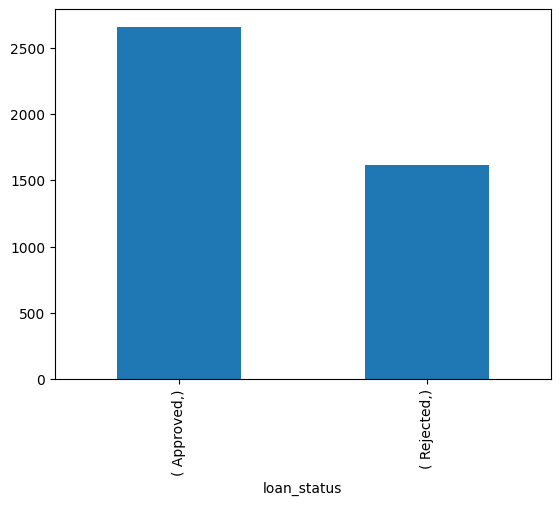

In [9]:
#df[["loan_status"]].value_counts().plot(kind="bar")
df[["loan_status"]].value_counts().plot(kind="bar")

In [10]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


#### visualization of the numerical variable

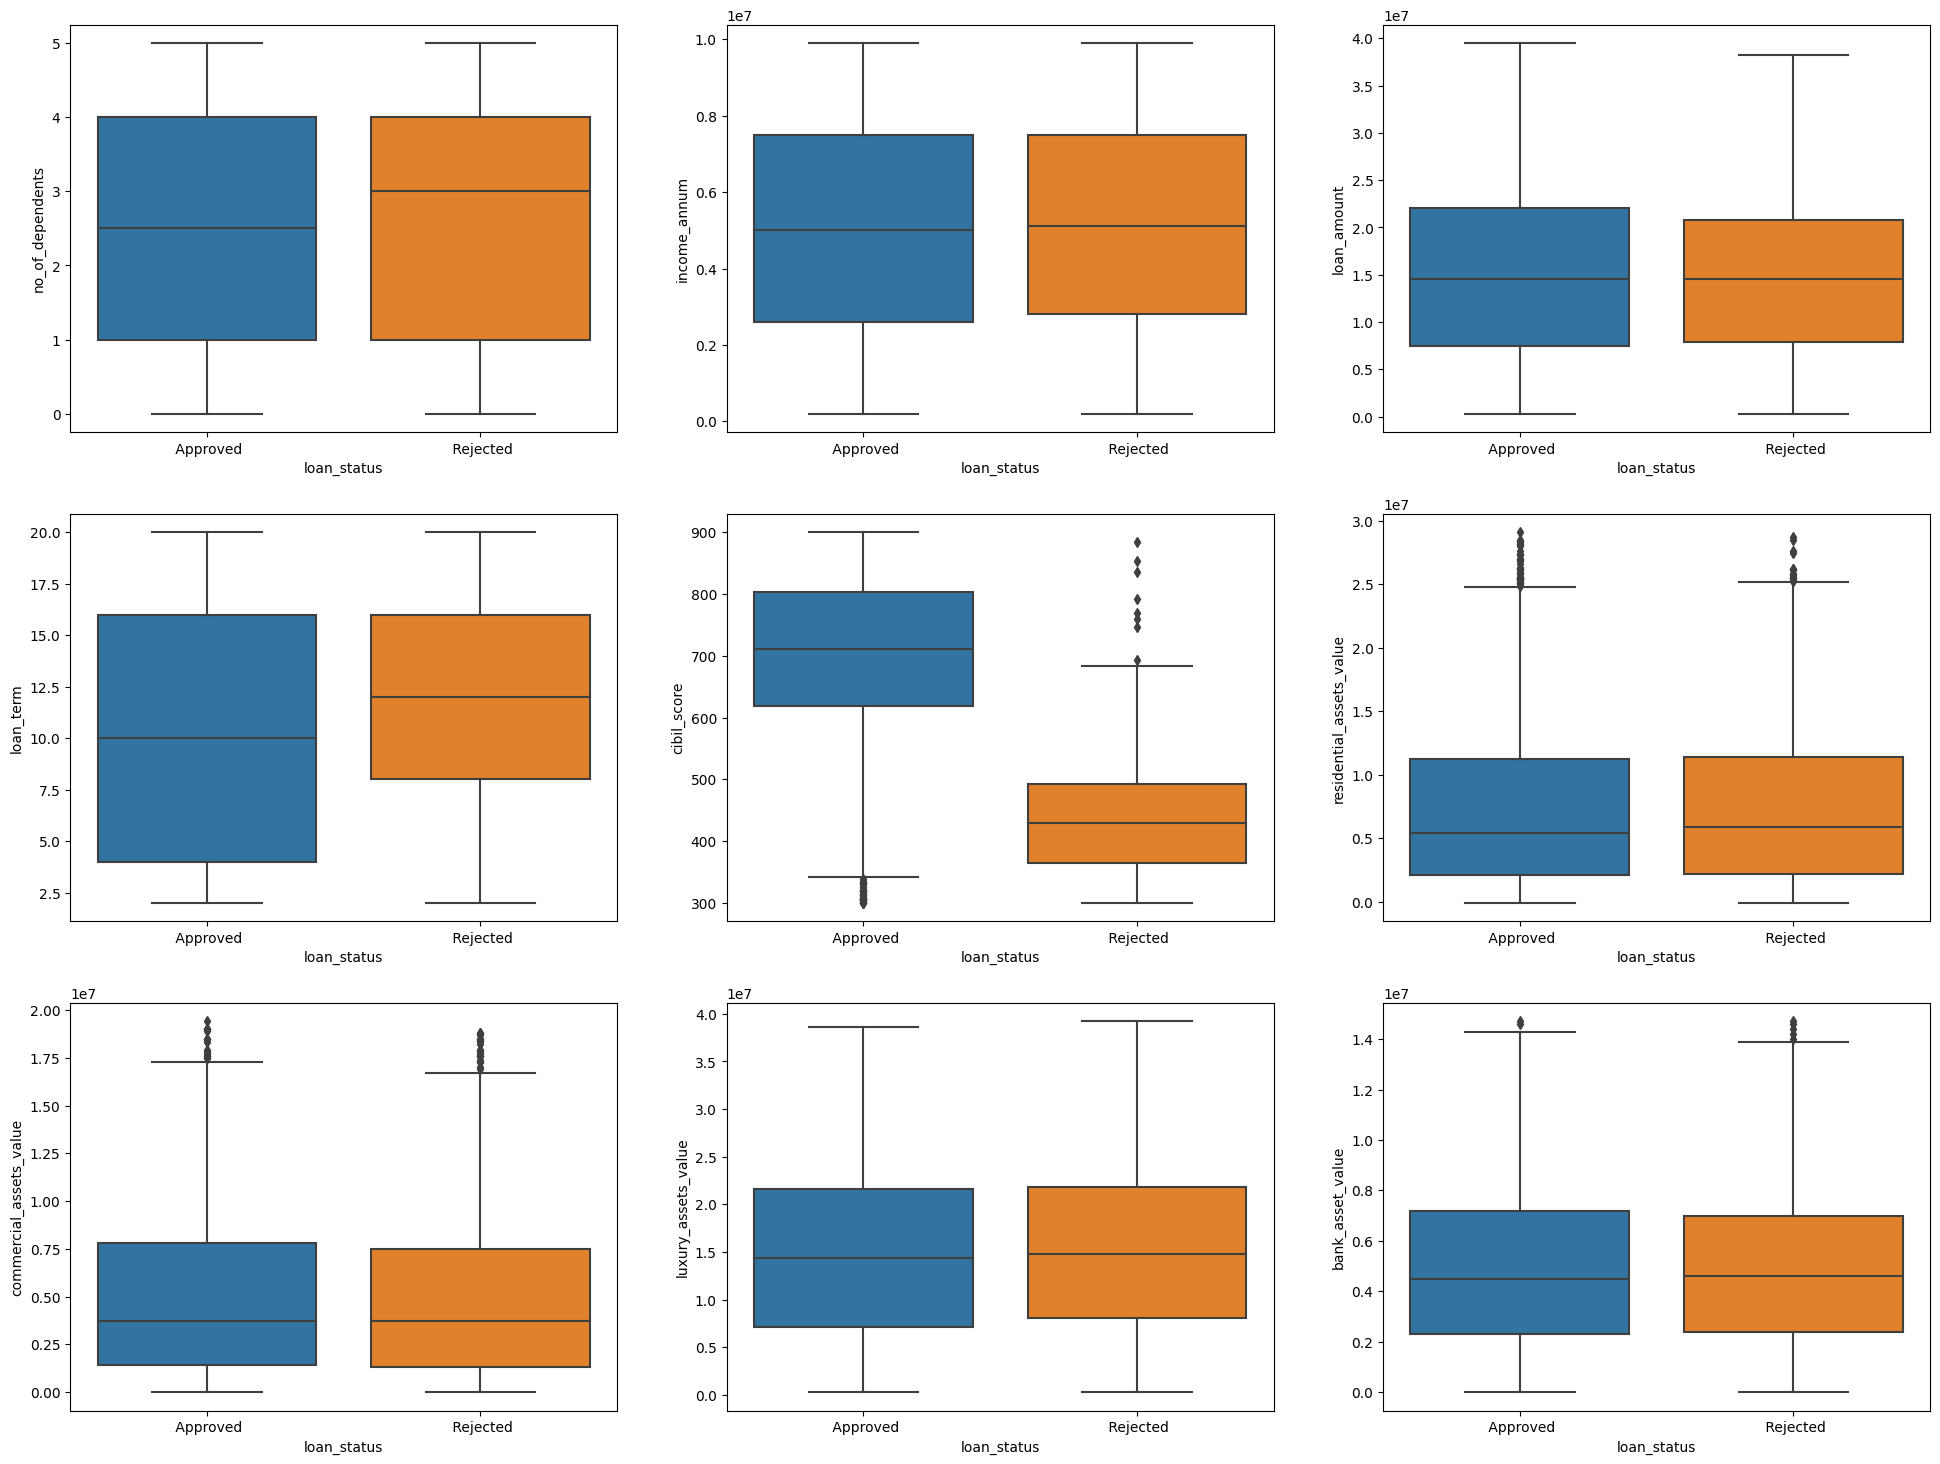

In [11]:
feature=list(numerical)
fig,axes=plt.subplots(3,3,figsize=(24,18))
axes=axes.flatten()
for i in range(len(feature)):
    sns.boxplot(x="loan_status",y=feature[i],data=df,ax=axes[i])

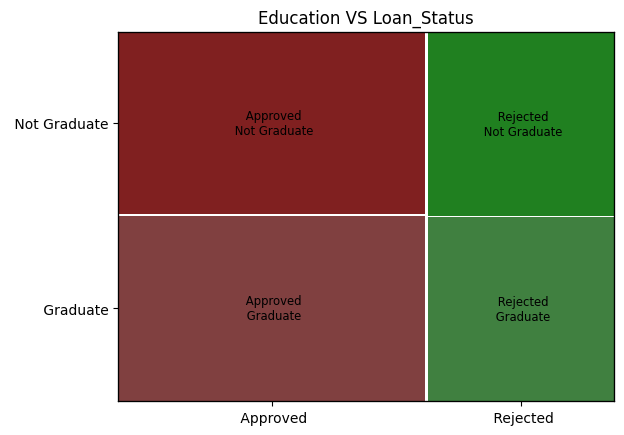

In [14]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df,['loan_status',"education"],title='Education VS Loan_Status')
plt.show()

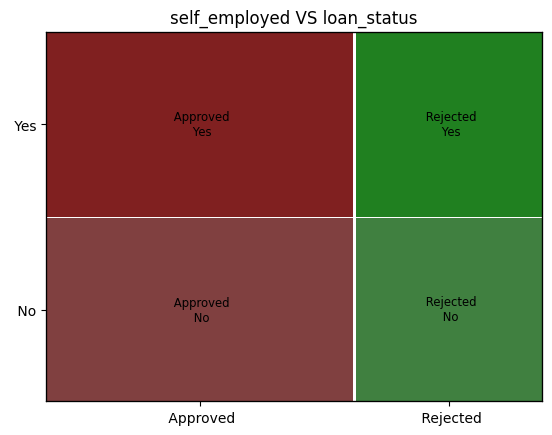

In [15]:
mosaic(df,["loan_status",'self_employed'],title='self_employed VS loan_status')
plt.show()


### Preprocessing

#### Label encoding the categorial variable

In [65]:
feature=list(categorical)
le=LabelEncoder()
for i in feature:
    df[i]=le.fit_transform(df[i])
print(df.head(2))


   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          0              0       9600000     29900000   
1                 0          1              1       4100000     12200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   

   luxury_assets_value  bank_asset_value  loan_status  
0             22700000           8000000            0  
1              8800000           3300000            1  


#### Split the dataset into Independent variable and Dependent variable

In [66]:
y=df.iloc[:,-1]
x=df.iloc[:,0:11]

### Model Building

#### Import Necessary Libaray

In [67]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.tree import DecisionTreeClassifier as DT
#from lightgbm import LGBMClassifier

#### Splite the dataset in train and test data

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2988, 11)
(2988,)
(1281, 11)
(1281,)


#### Normalization of the features

In [69]:
sc=StandardScaler()
x_train=pd.DataFrame(sc.fit_transform(x_train))
x_test=pd.DataFrame(sc.fit_transform(x_test))

#### Addressing Class imbalance using SMOTE

In [70]:
from imblearn.over_sampling import SMOTE
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
sm=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=sm.fit_resample(x_train,y_train)
print("Before Undersampling, counts of label '1': {}".format(sum(y_train_resampled == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train_resampled == 0)))

Before Undersampling, counts of label '1': 1135
Before Undersampling, counts of label '0': 1853 

Before Undersampling, counts of label '1': 1853
Before Undersampling, counts of label '0': 1853 



#### Training

##### Random Forest

In [71]:
RF_model=RF()
RF_model.fit(x_train_resampled,y_train_resampled)
y_pred=RF_model.predict(x_test)
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuarcy of the model:",acc*100)
print("Classification Report")
print(metrics.classification_report(y_test,y_pred))

Accuarcy of the model: 96.17486338797814
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       803
           1       0.92      0.99      0.95       478

    accuracy                           0.96      1281
   macro avg       0.95      0.97      0.96      1281
weighted avg       0.96      0.96      0.96      1281



#### Feature Importance

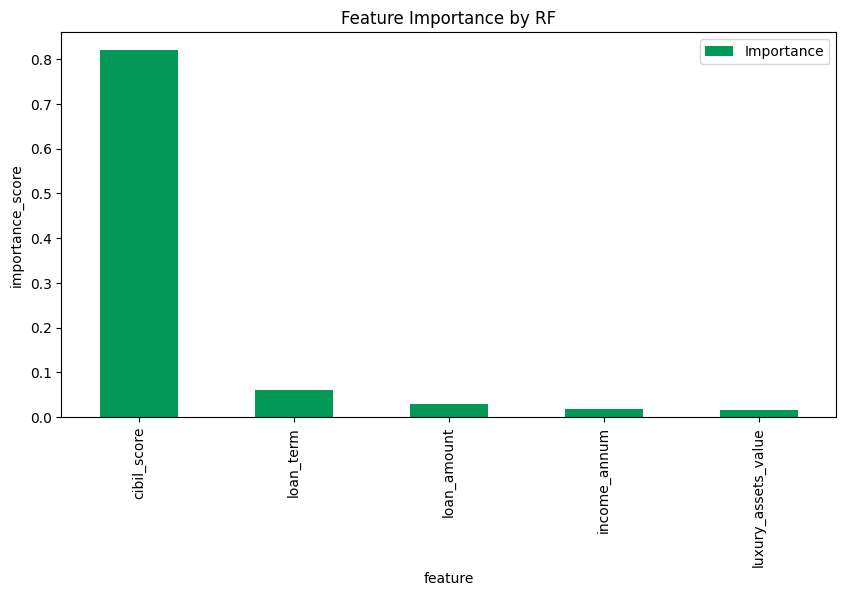

In [73]:
feature_importance=pd.DataFrame({"Importance":RF().fit(x,y).feature_importances_},index=x.columns)  
feature_importance.sort_values(by="Importance",ascending=False,axis=0)[:5].plot(kind="bar",color='#019955',figsize=(10,5))
plt.title("Feature Importance by RF")
plt.xlabel("feature")
plt.ylabel("importance_score")
plt.show()